In [1]:
# !pip install pandas==1.2.0

# !pip install xlrd==1.2.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
sales=pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',parse_dates=['Order Date'])
sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
categorical =  ['Ship Mode', 'Segment', 'Country', 'Region','State', 'Category']
continuous =  ['Row ID' ,'Sales', 'Profit', 'Quantity', 'Discount']

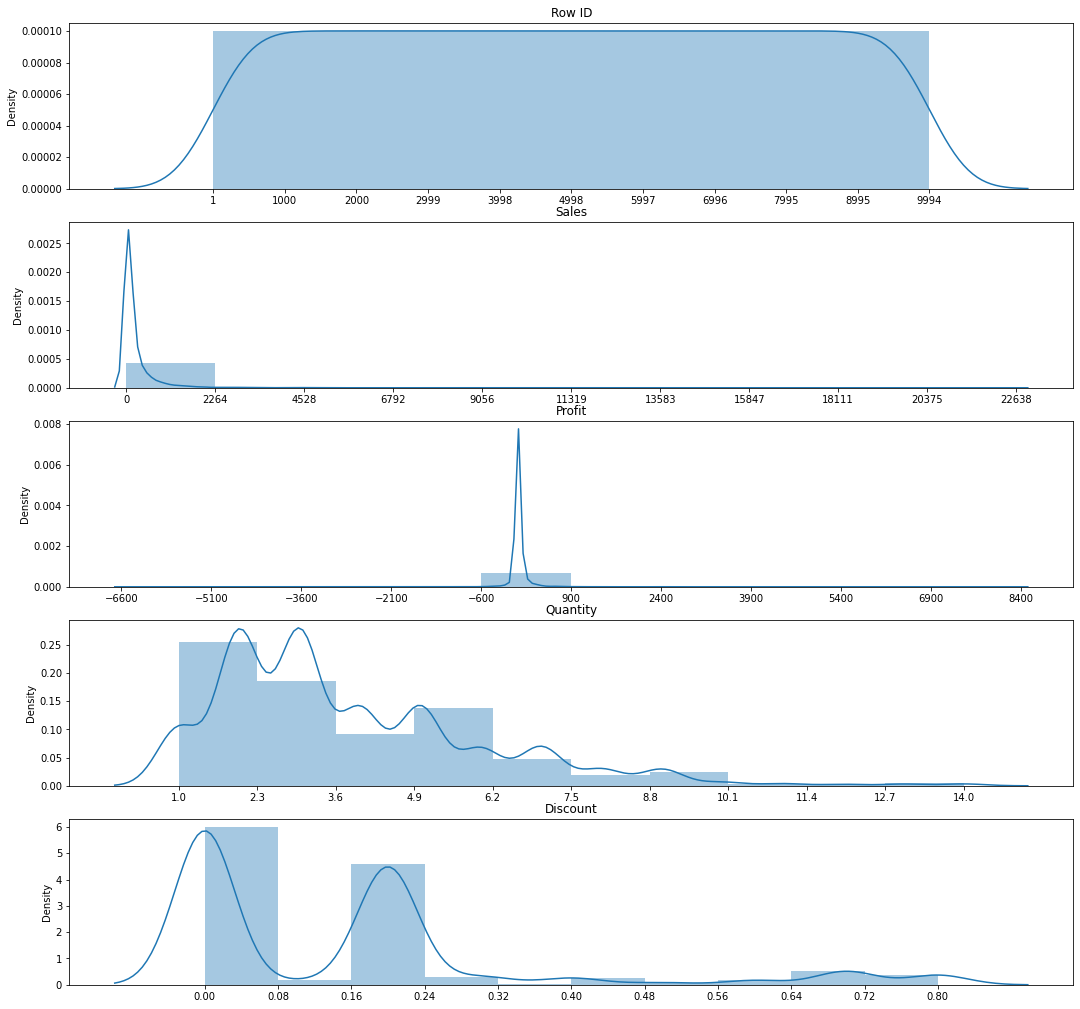

In [6]:
b=list(enumerate(continuous))
plt.figure(figsize=(18,36))
for x in b:
    plt.subplot(10,1,x[0]+1)
    sns.distplot(x=sales[x[1]],bins=10)
    plt.xticks(np.linspace(min(sales[x[1]]),max(sales[x[1]]),11)) 
    plt.title(x[1])
plt.show()

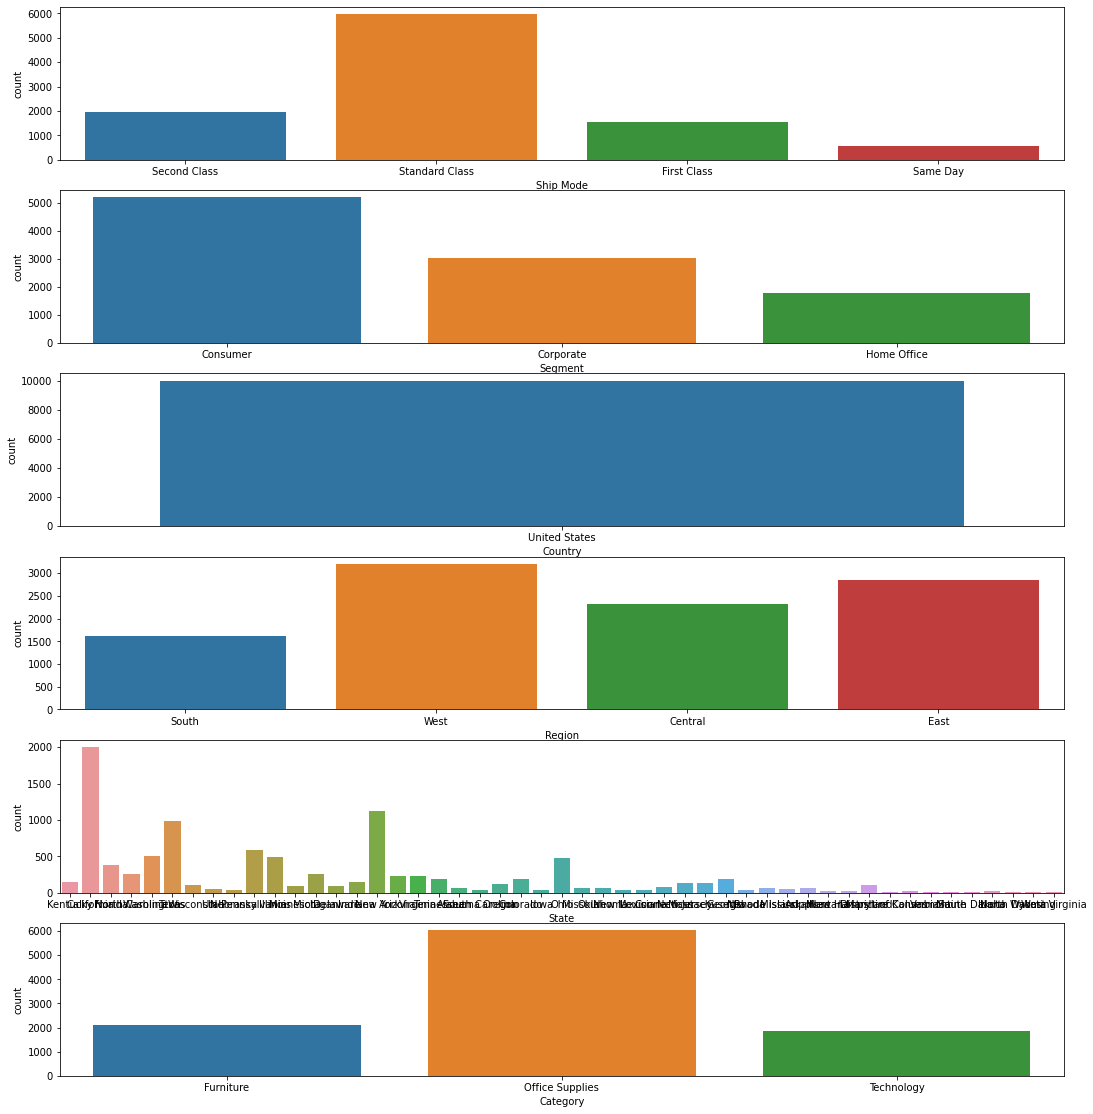

In [7]:
b=list(enumerate(categorical))
plt.figure(figsize=(18,50))
for x in b:
    plt.subplot(15,1,x[0]+1)
    sns.countplot(x=sales[x[1]]) 
plt.show()

In [8]:
sales=sales.set_index(sales['Order Date'])
sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2016-11-08,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2016-06-12,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [9]:
df=sales.copy()

In [10]:
data=df.sort_index(ascending=True)
data=data.resample('M').sum()
data.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,346176,4342297,14236.895,284,10.00,2450.1907
2014-02-28,272235,3049775,4519.892,159,8.10,862.3084
2014-03-31,871575,8314538,55691.009,585,26.30,498.7299
2014-04-30,690625,7723827,28295.345,536,14.85,3488.8352
2014-05-31,611708,6497804,23648.287,466,18.95,2738.7096


In [11]:
ind= int(np.round(len(data)*0.7,0))
train=data[:ind]
test=data[ind:]

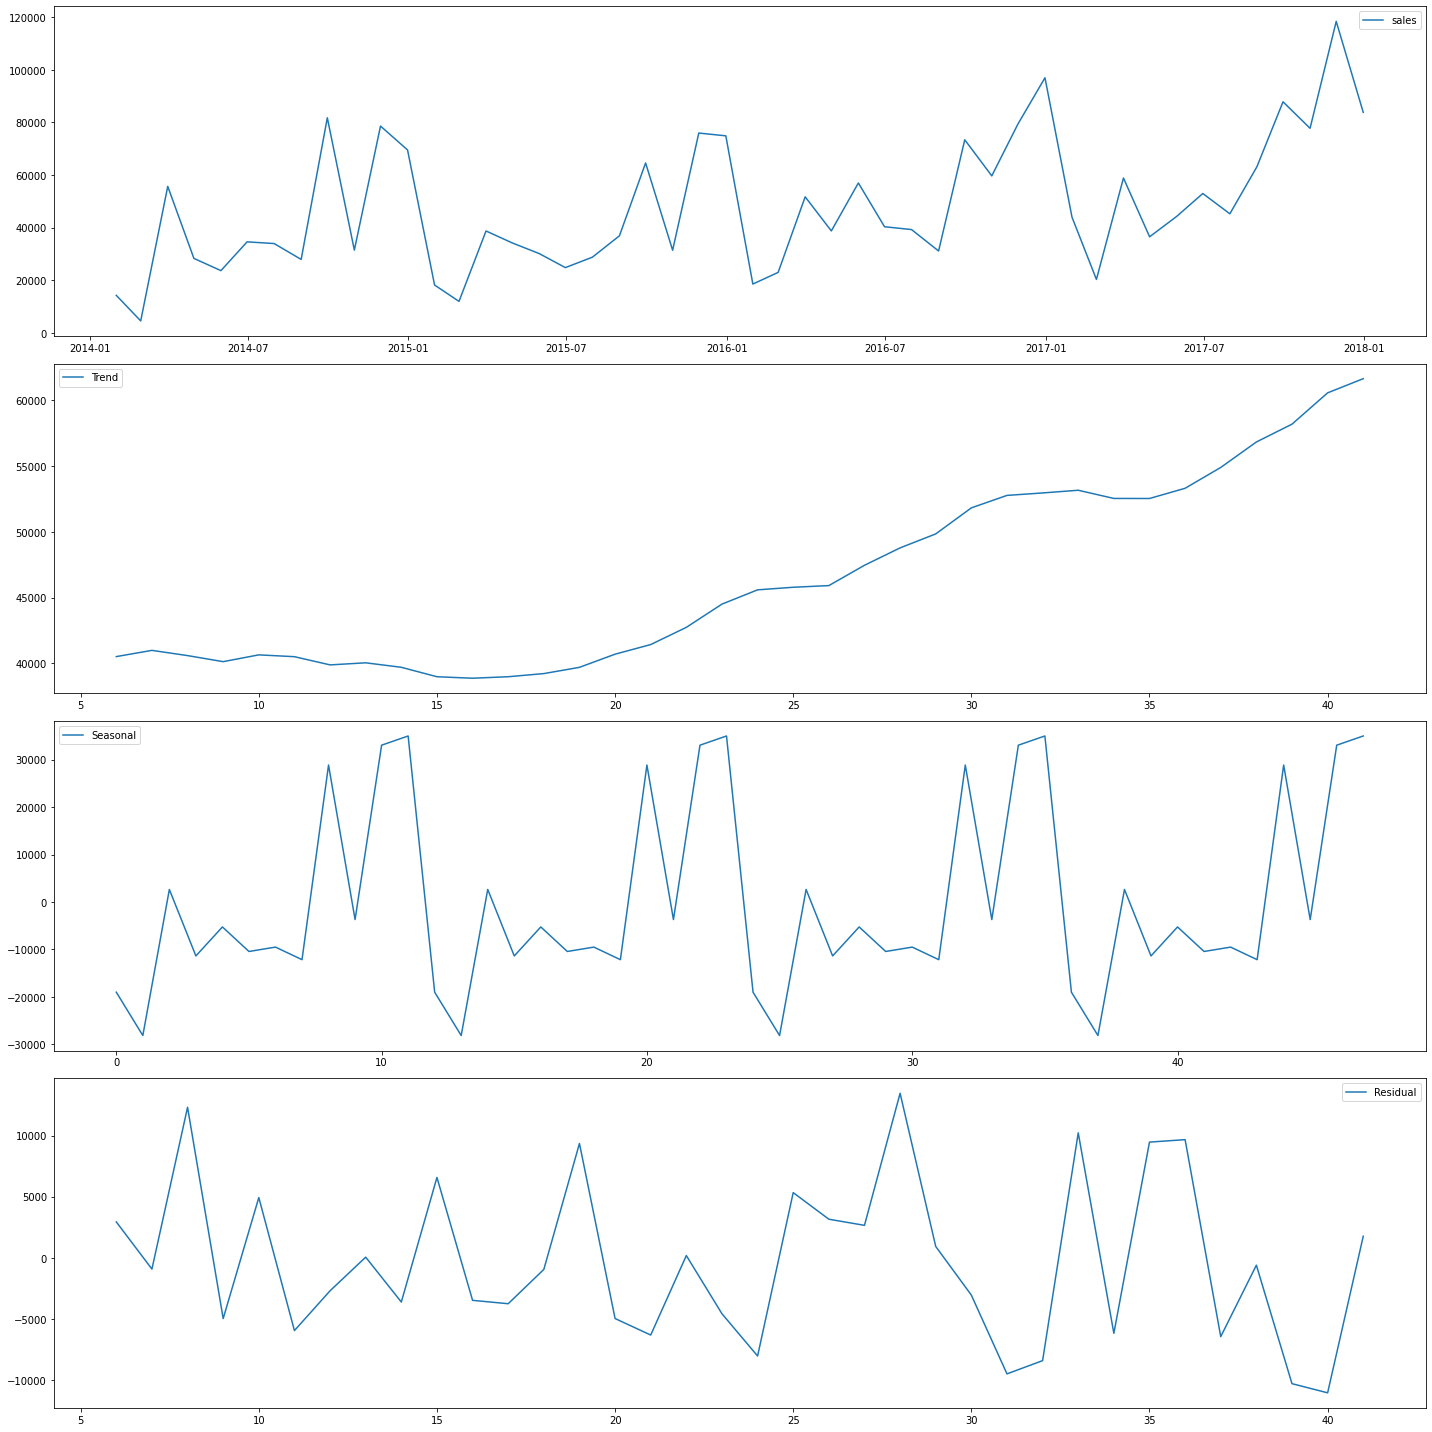

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

decomposition=seasonal_decompose(np.asarray(data['Sales']), period=12)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(5,1,figsize=(20,20))

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(data['Sales'],label='sales')
plt.legend(loc='best')


plt.tight_layout()

In [14]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
def checkStationarity(data):
    pvalue = adfuller(data)[1]   
    if(pvalue>0.05):
        msg = 'p-value={}. data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. data is stationary'.format(pvalue)
        
    return(msg)

In [15]:
ret=checkStationarity(train['Sales']); ret

'p-value=0.00039743372197136267. data is stationary'

In [16]:
ret=checkStationarity(test['Sales']); ret

'p-value=0.5272952443725872. data is not stationary'

In [17]:
ret=checkStationarity(data['Sales']); ret

'p-value=0.00020180198458237607. data is stationary'

In [18]:
diff_temp = data['Sales'] - data['Sales'].shift()
diff_temp.dropna(inplace=True)
diff_temp.head()

Order Date
2014-02-28    -9717.0030
2014-03-31    51171.1170
2014-04-30   -27395.6640
2014-05-31    -4647.0580
2014-06-30    10946.8406
Freq: M, Name: Sales, dtype: float64

In [19]:
ind= int(np.round(len(diff_temp)*0.7,0))
train=diff_temp[:ind]
test=diff_temp[ind:]

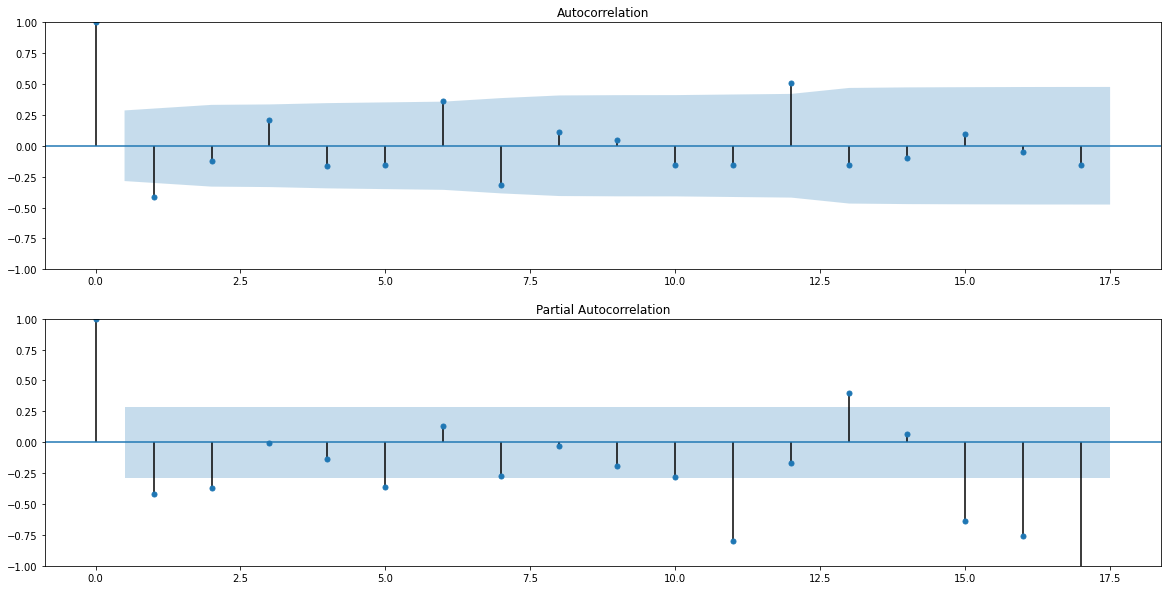

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,ax=plt.subplots(2,1,figsize=(20,10))
plot_acf(diff_temp,ax=ax[0])
plot_pacf(diff_temp,ax=ax[1])
plt.show()

In [21]:
# ! pip install pmdarima

# ARMA

In [22]:
from statsmodels.tsa.arima.model import ARIMA
sel={}
selx={}
for p in range(1,5):
    for q in range(1,5):
        m1 = ARIMA(train,order=(p,0,q)).fit()
        sel[f'({p},0,{q})']=m1.aic
        selx[f'({p},0,{q})']=m1.llf

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: 

In [23]:
min_key=min(sel,key=sel.get)
min_key

'(1,0,1)'

In [24]:
max_key=max(selx,key=selx.get)
max_key

'(4,0,3)'

In [25]:
sel

{'(1,0,1)': 760.4241638165602,
 '(1,0,2)': 763.5846162864991,
 '(1,0,3)': 761.8915741633286,
 '(1,0,4)': 764.8344952611747,
 '(2,0,1)': 763.8253543695364,
 '(2,0,2)': 765.4929466532192,
 '(2,0,3)': 763.1813508514456,
 '(2,0,4)': 763.9793635952282,
 '(3,0,1)': 765.2171589470296,
 '(3,0,2)': 766.8828330625391,
 '(3,0,3)': 764.6230991426884,
 '(3,0,4)': 767.2837377367233,
 '(4,0,1)': 767.1806668800831,
 '(4,0,2)': 766.2159020412198,
 '(4,0,3)': 765.3321871760188,
 '(4,0,4)': 767.9203792734194}

In [26]:
selx

{'(1,0,1)': -376.2120819082801,
 '(1,0,2)': -376.79230814324956,
 '(1,0,3)': -374.9457870816643,
 '(1,0,4)': -375.4172476305873,
 '(2,0,1)': -376.9126771847682,
 '(2,0,2)': -376.7464733266096,
 '(2,0,3)': -374.5906754257228,
 '(2,0,4)': -373.9896817976141,
 '(3,0,1)': -376.6085794735148,
 '(3,0,2)': -376.44141653126957,
 '(3,0,3)': -374.3115495713442,
 '(3,0,4)': -374.64186886836166,
 '(4,0,1)': -376.59033344004155,
 '(4,0,2)': -375.1079510206099,
 '(4,0,3)': -373.6660935880094,
 '(4,0,4)': -373.9601896367097}

In [27]:
from statsmodels.tsa.arima.model import ARIMA

p=4
d=0
q=3
m1 = ARIMA(train,order=(p,d,q)).fit()
predictions=m1.predict(0,len(train))
actual=[]
predicted=[]
for i in range(len(test)):
    actual.append(test[i])
    predicted.append(predictions[i])
    df_res = pd.DataFrame({'actual':actual, 'predicted':predicted})
    df_res['err'] = df_res.actual - df_res.predicted
df_res

,actual,predicted,err
0,19724.2208,1377.183291,18347.037509
1,17587.0772,6053.453416,11533.623784
2,-53027.6690,-23673.745283,-29353.923717
3,-23670.2406,-2844.928016,-20825.312584
4,38571.2194,12551.959554,26019.259846
5,-22350.8167,-752.142460,-21598.674240
6,7739.5741,-7349.544143,15089.118243
7,8720.6155,13298.157427,-4577.541927
8,-7717.3097,-35435.368614,27718.058914
9,17856.4720,8262.082994,9594.389006


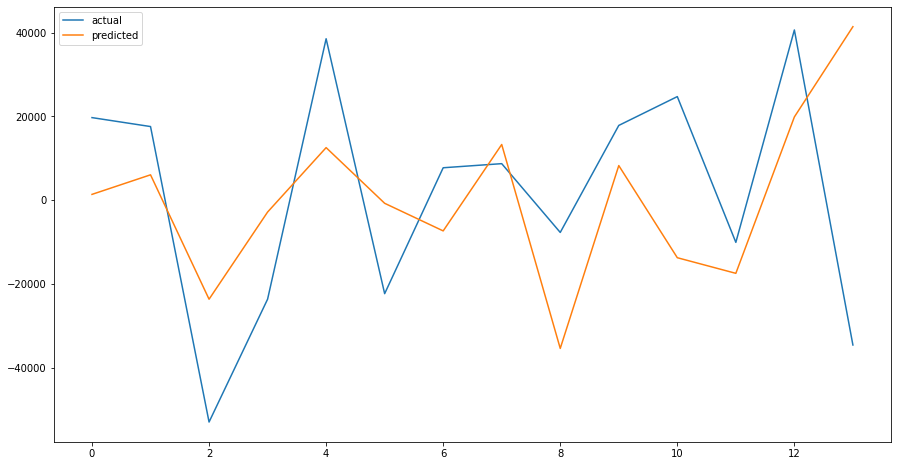

In [29]:
ax=plt.subplots(figsize=(15,8))
plt.plot(df_res.actual,label='actual')
plt.plot(df_res.predicted,label='predicted')
plt.legend()
plt.show()

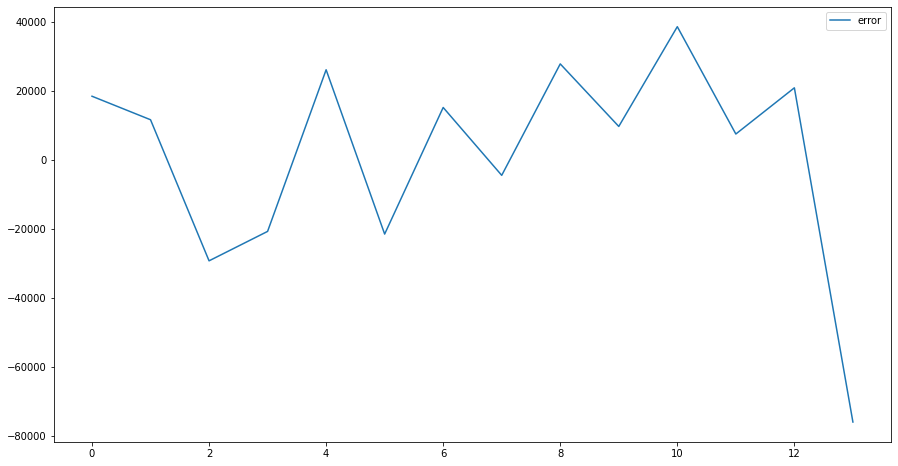

In [30]:
ax=plt.subplots(figsize=(15,8))
plt.plot(df_res.err,label='error')
plt.legend()
plt.show()

In [31]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [32]:
fcast = m1.predict(start=len(diff_temp), end=len(diff_temp)+20, typ='levels')
print(fcast.head())

2018-01-31    11424.266481
2018-02-28    -8718.529268
2018-03-31    11540.353217
2018-04-30    -8805.384462
2018-05-31    11533.396191
Freq: M, Name: predicted_mean, dtype: float64


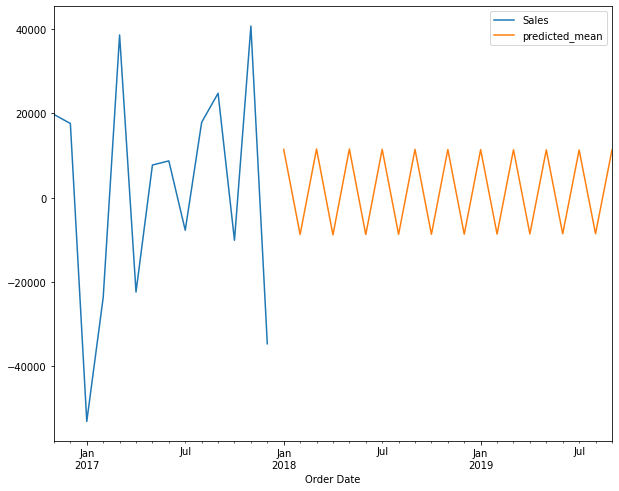

In [33]:
test.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)
plt.show()


# ARIMA

In [34]:
sel1={}
selx1={}
for p in range(1,5):
  for d in range(1,3):
    for q in range(1,5):
        m2 = ARIMA(train,order=(p,d,q)).fit()
        sel1[f'({p},{d},{q})']=m2.aic
        selx1[f'({p},{d},{q})']=m2.llf

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [35]:
min_key=min(sel1,key=sel1.get)
min_key

'(3,2,3)'

In [36]:
max_key=max(selx1,key=selx1.get)
max_key

'(4,2,4)'

In [37]:
p=4
d=2
q=4
m2 = ARIMA(train,order=(p,d,q)).fit()
predictions=m2.predict(0,len(train))
actual=[]
predicted=[]
for i in range(len(test)):
    actual.append(test[i])
    predicted.append(predictions[i])
    df_res1 = pd.DataFrame({'actual':actual, 'predicted':predicted})
    df_res1['err'] = df_res1.actual - df_res1.predicted
df_res1

,actual,predicted,err
0,19724.2208,0.000000,19724.220800
1,17587.0772,-12594.434571,30181.511771
2,-53027.6690,37223.650033,-90251.319033
3,-23670.2406,20008.781865,-43679.022465
4,38571.2194,12057.774154,26513.445246
5,-22350.8167,3777.155038,-26127.971738
6,7739.5741,-15107.181184,22846.755284
7,8720.6155,16891.213176,-8170.597676
8,-7717.3097,-15716.105474,7998.795774
9,17856.4720,16229.195739,1627.276261


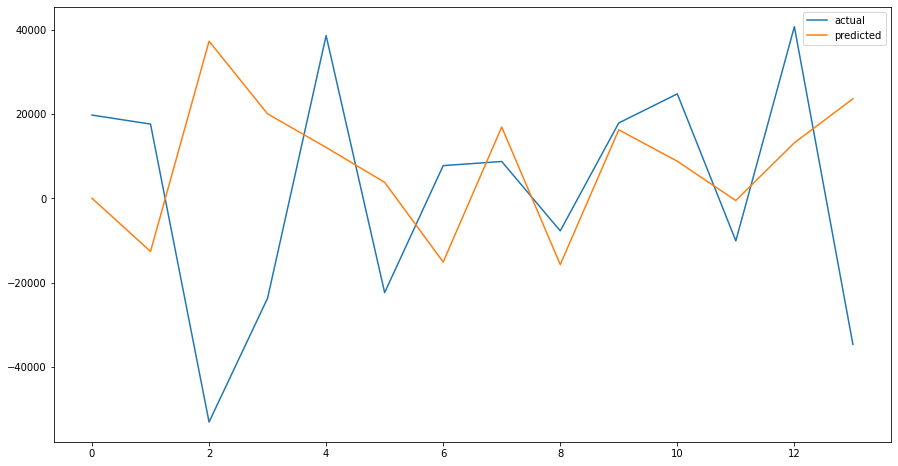

In [38]:
ax=plt.subplots(figsize=(15,8))
plt.plot(df_res1.actual,label='actual')
plt.plot(df_res1.predicted,label='predicted')
plt.legend()
plt.show()

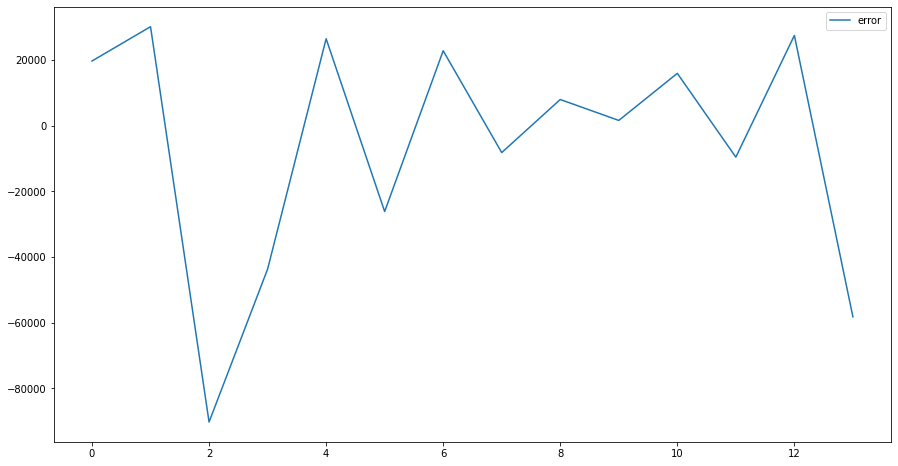

In [39]:
ax=plt.subplots(figsize=(15,8))
plt.plot(df_res1.err,label='error')
plt.legend()
plt.show()

In [40]:
pvalue = sm.stats.acorr_ljungbox(m2.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [41]:
fcast1 = m2.predict(start=len(diff_temp), end=len(diff_temp)+20, typ='levels')
print(fcast1.head())

2018-01-31    19616.977908
2018-02-28     1214.058660
2018-03-31    20815.011107
2018-04-30     2164.063325
2018-05-31    21788.833619
Freq: M, Name: predicted_mean, dtype: float64


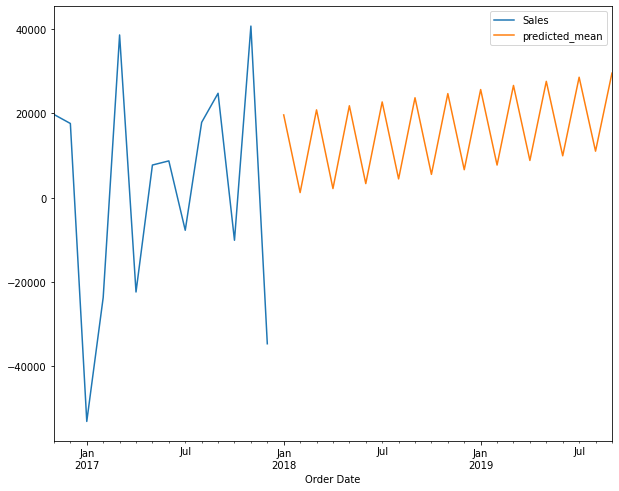

In [42]:
test.plot(figsize=(10,8),legend=True)
fcast1.plot(legend=True)
plt.show()


# SARIMA

In [43]:
sel_a={}
selx_a={}
for p in range(1,5):
  for d in range(0,2):
    for q in range(1,5):
        m3 = sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
        sel_a[f'({p},{d},{q})']=m3.aic
        selx_a[f'({p},{d},{q})']=m3.llf

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: 

In [44]:
min_key=min(sel_a,key=sel_a.get)
min_key

'(1,1,1)'

In [45]:
max_key=max(selx_a,key=selx_a.get)
max_key

'(3,1,3)'

In [46]:
p=1
d=1
q=1
m3 = sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()

In [47]:
predictions_a = m3.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)

In [48]:
predictions_a

2016-11-30    35013.065161
2016-12-31     -477.248767
2017-01-31   -49056.472176
2017-02-28     1989.447415
2017-03-31    29000.766821
2017-04-30   -11732.199289
2017-05-31    12495.472624
2017-06-30   -11736.363568
2017-07-31      126.390107
2017-08-31    -4701.574207
2017-09-30    39172.983680
2017-10-31   -18540.609133
2017-11-30    36123.374806
2017-12-31     -977.702606
Freq: M, Name: predicted_mean, dtype: float64

In [49]:
df_res_a = pd.DataFrame({'actual':test,'predicted':predictions_a})
df_res_a['err'] = df_res_a.actual - df_res_a.predicted
print(df_res_a)

                actual     predicted           err
2016-11-30  19724.2208  35013.065161 -15288.844361
2016-12-31  17587.0772   -477.248767  18064.325967
2017-01-31 -53027.6690 -49056.472176  -3971.196824
2017-02-28 -23670.2406   1989.447415 -25659.688015
2017-03-31  38571.2194  29000.766821   9570.452579
2017-04-30 -22350.8167 -11732.199289 -10618.617411
2017-05-31   7739.5741  12495.472624  -4755.898524
2017-06-30   8720.6155 -11736.363568  20456.979068
2017-07-31  -7717.3097    126.390107  -7843.699807
2017-08-31  17856.4720  -4701.574207  22558.046207
2017-09-30  24745.7640  39172.983680 -14427.219680
2017-10-31 -10089.7288 -18540.609133   8450.880333
2017-11-30  40670.9018  36123.374806   4547.526994
2017-12-31 -34618.5062   -977.702606 -33640.803594


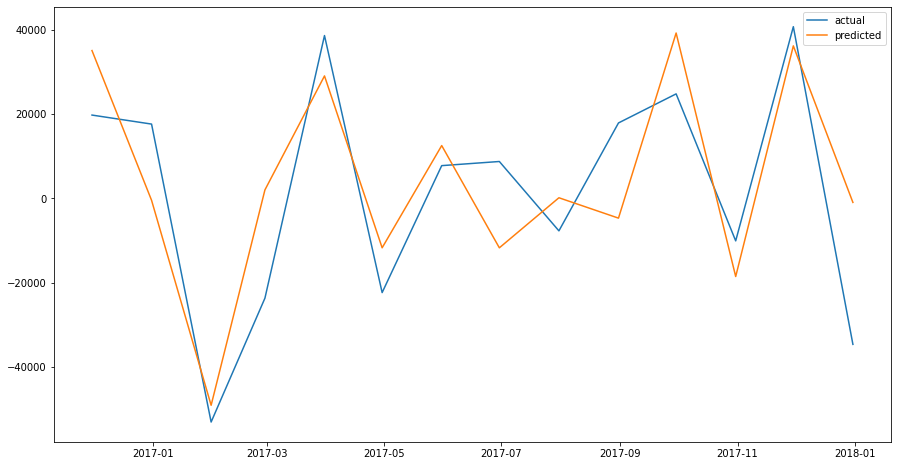

In [50]:
ax=plt.subplots(figsize=(15,8))
plt.plot(df_res_a.actual,label='actual')
plt.plot(df_res_a.predicted,label='predicted')
plt.legend()
plt.show()

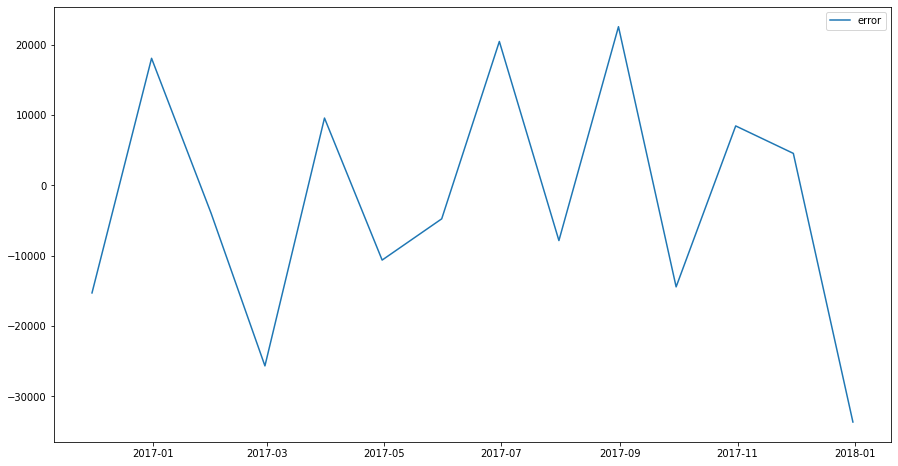

In [51]:
ax=plt.subplots(figsize=(15,8))
plt.plot(df_res_a.err,label='error')
plt.legend()
plt.show()

In [52]:
fcast = m3.predict(start=len(diff_temp), end=len(diff_temp)+20, typ='levels')
print(fcast)

2018-01-31   -47507.959702
2018-02-28     1692.501227
2018-03-31    29224.337400
2018-04-30   -11383.124753
2018-05-31    11749.233275
2018-06-30   -10800.106794
2018-07-31      478.292930
2018-08-31    -3996.081567
2018-09-30    38839.438192
2018-10-31   -19142.657411
2018-11-30    36459.482060
2018-12-31     -896.484897
2019-01-31   -47102.512648
2019-02-28     1805.922464
2019-03-31    29420.125339
2019-04-30   -11167.477071
2019-05-31    11791.558350
2019-06-30   -10491.543313
2019-07-31      694.388165
2019-08-31    -3724.034233
2019-09-30    38947.067997
Freq: M, Name: predicted_mean, dtype: float64


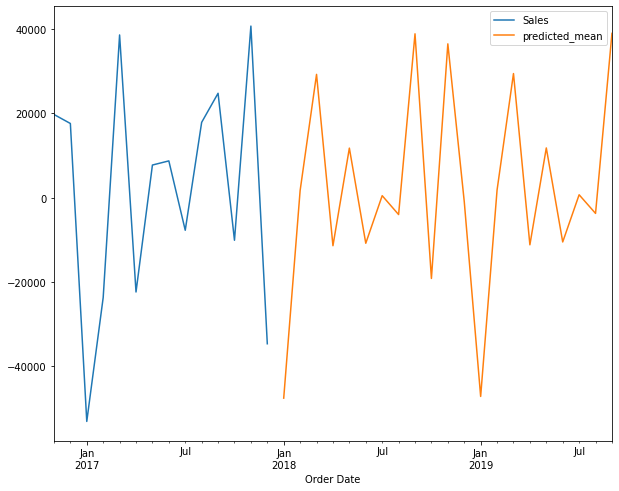

In [53]:
test.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)
plt.show()

In [54]:
pvalue = sm.stats.acorr_ljungbox(m3.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [55]:
from sklearn.metrics import mean_squared_error
print('ARMA MSE :',mean_squared_error(df_res.actual,df_res.predicted))
print('ARIMA MSE :',mean_squared_error(df_res1.actual,df_res1.predicted))
print('SARIMA MSE:',mean_squared_error(df_res_a.actual,df_res_a.predicted))

ARMA MSE : 840989194.5336136
ARIMA MSE : 1277495769.3413308
SARIMA MSE: 277289184.2191993


In [56]:
print('ARMA RMSE :',np.sqrt(mean_squared_error(df_res.actual,df_res.predicted)))
print('ARIMA RMSE :',np.sqrt(mean_squared_error(df_res1.actual,df_res1.predicted)))
print('SARIMA RMSE:',np.sqrt(mean_squared_error(df_res_a.actual,df_res_a.predicted)))

ARMA RMSE : 28999.813698256985
ARIMA RMSE : 35742.07281819748
SARIMA RMSE: 16652.002408695458


In [57]:
print('ARMA AIC :',m1.aic)
print('ARIMA AIC :',m2.aic)
print('SARIMA AIC:',m3.aic)

ARMA AIC : 765.3321871760188
ARIMA AIC : 734.9951418739286
SARIMA AIC: 443.8536938344997


In [58]:
print('ARMA BIC :',m1.bic)
print('ARIMA BIC :',m2.bic)
print('SARIMA BIC:',m3.bic)

ARMA BIC : 778.8007552292171
ARIMA BIC : 747.9010267142949
SARIMA BIC: 448.8323552022697


# Best Model is SARIMA